In [2]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org pandas

import tensorflow as tf
from keras import layers
import pandas as pd

In [4]:
#https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

#Load data from keras toy datasets
(x_train_org, y_train_org), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#split the training data set to train and validate. Validation is not the test data set
x_train, y_train = x_train_org[:-5000], y_train_org[:-5000]
x_validation, y_validation = x_train_org[-5000:], y_train_org[-5000:]

In [5]:
x_train, x_validation, x_test = x_train/255.0, x_validation/255.0, x_test/255.0

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [6]:
fashion_cat = ["0	T-shirt/top", 
"1	Trouser", 
"2	Pullover", 
"3	Dress", 
"4	Coat", 
"5	Sandal", 
"6	Shirt", 
"7	Sneaker", 
"8	Bag", 
"9	Ankle boot"]

#fashion_cat[y_train[5]]

In [7]:
#Build a 3 hidden layer dense neural network for classification


model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu", name="hl_1"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="hl_2"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="hl_3"))

#initialize weights and biases for the layer
layers.Dense(units=300, name="hl_1", kernel_initializer='random_normal', bias_initializer='zero')
layers.Dense(units=100, name="hl_2", kernel_initializer='random_normal', bias_initializer='zero')
layers.Dense(units=10, name="hl_3", kernel_initializer='random_normal', bias_initializer='zero')

<Dense name=hl_3, built=False>

In [8]:
model.summary()
#total number of parameters (w, b) = ((784*300) + 300) + ((300*100) + 100) + ((100*10) + 10) = 
#235,500 + 30,100 + 1,010 = 266610

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl_1 (Dense)                    │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl_2 (Dense)                    │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl_3 (Dense)                    │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
weights, biases = model.get_layer("hl_1").get_weights()
print("Parameters and bias shape: ", weights.shape, "and", biases.shape)
print("Parameters and bias count: ", weights.size, "and", biases.size)
print("Parameters: ", weights)

Parameters and bias shape:  (784, 300) and (300,)
Parameters and bias count:  235200 and 300
Parameters:  [[ 0.05840163 -0.01851176  0.07408062 ...  0.05007632  0.019844
   0.07281712]
 [ 0.05197228 -0.03590034 -0.04162723 ... -0.06290675 -0.05752344
  -0.04324964]
 [-0.03823222 -0.05781923  0.06805165 ...  0.04132948 -0.00907077
   0.05423452]
 ...
 [-0.05737442 -0.04863496 -0.04490469 ... -0.05122226 -0.06809554
   0.04081891]
 [ 0.04423315 -0.00302627 -0.05635096 ... -0.05098046 -0.07096303
  -0.01091193]
 [-0.04855223 -0.01620704  0.0158876  ... -0.05240429 -0.0267655
   0.040999  ]]


In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [12]:
history = model.fit(x_train, y_train, epochs = 25, validation_data=(x_validation, y_validation))

#batch size is 32 by default. It can be changed using batch_size parameter
#training set is 55000
#number of batches per epoch is 1719 based on 55000/32 => 1718 of batch size 32 and remaining 24 is the batch 1719

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6978 - loss: 0.9606 - val_accuracy: 0.8236 - val_loss: 0.4985
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8287 - loss: 0.4977 - val_accuracy: 0.8386 - val_loss: 0.4447
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8414 - loss: 0.4495 - val_accuracy: 0.8470 - val_loss: 0.4248
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8559 - loss: 0.4150 - val_accuracy: 0.8598 - val_loss: 0.3990
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8608 - loss: 0.3978 - val_accuracy: 0.8582 - val_loss: 0.3939
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8685 - loss: 0.3732 - val_accuracy: 0.8674 - val_loss: 0.3726
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8729 - loss: 0.3605 - val_accuracy: 0.8644 - val_loss: 0.3716
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8767 - loss: 0.3459 - 

In [13]:
weights, biases = model.get_layer("hl_1").get_weights()
print("Parameters:\n ", weights)
print("\n\nBiases:\n ", biases)

Parameters:
  [[ 0.05842537 -0.01852998  0.07408062 ...  0.05006712  0.01991932
   0.07279824]
 [ 0.05203132 -0.03587835 -0.04162684 ... -0.06279778 -0.0574066
  -0.04322335]
 [-0.03819115 -0.05734716  0.0680548  ...  0.04203633 -0.00875079
   0.05423963]
 ...
 [-0.05963512 -0.06162634 -0.04473829 ... -0.04527765 -0.06725243
   0.04216166]
 [ 0.04366907 -0.0101969  -0.05639186 ... -0.05010975 -0.07163651
  -0.01108374]
 [-0.04853931 -0.01678847  0.01588674 ... -0.05138315 -0.02668422
   0.04105855]]


Biases:
  [ 1.51358098e-01  1.12363230e-02 -1.16376663e-02  3.52397445e-03
  1.39839485e-01 -8.31045881e-02  2.35095069e-01  2.12877039e-02
 -8.45526997e-03  5.48338285e-03  7.32624158e-02  7.71101713e-02
  1.99265312e-03  7.63460770e-02  6.30518869e-02  1.33030534e-01
  1.68699861e-01 -4.14977185e-02  2.74765603e-02  3.28961834e-02
  8.74539022e-04 -3.09155732e-02  6.09915257e-02  4.19998681e-03
  5.03986776e-02  1.33873448e-01  7.10217953e-02 -3.66308726e-02
  6.86691776e-02 -1.95925729

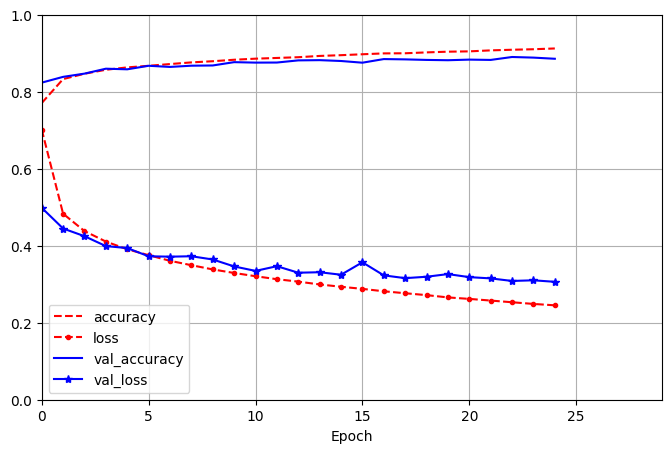

In [14]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

Hyperparameters to tune on the train set: Learning Rate, # of layers, # of neurons, activation function type, batch size, 

In [15]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8802 - loss: 0.3332


[0.3339834213256836, 0.8791999816894531]

In [27]:
y_hat = model.predict(x_test[:3]).round(2)
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)